# Faktor Apakah yang Menjual Sebuah Mobil?

Mobil bekas datang dalam berbagai kondisi dan fitur yang menjadi faktor-faktor penentu harga jualnya nanti. Tahun dibuat, jumlah silinder,kondisi, odometer, dan lain-lain menentukan harga jual suati mobil bekas.

Analisis ini mempelajari faktor-faktor tersebut untuk membantu calon penjualn menentukan harga jual agar calon pembeli merasa cocok dengan harga yang ditawarkan.

## Tujuan

Menguji hipotesis:
1. Usia mobil mempengaruhi harga jual mobil.
2. Jarak tempuh mobil mempengaruhi harga jual mobil.
3. Kondisi mobil mempengaruhi harg jual mobil.

## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame
url = 'https://raw.githubusercontent.com/akbar-am/used-car-price-factors-analysis/main/vehicles_us%20(1).csv'
data = pd.read_csv(url)
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Mengeksplorasi Data Awal

- `price` - harga jual mobil
- `model_year` - tahun pembuatan mobil
- `model` - tipe mobil
- `condition` - kondisi mobil saat ini
- `cylinders` - jumlah silinder dalam mesin mobil
- `fuel` — bahan bakar yang digunakan, seperti bensin, solar, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission` - tipe transmisi pada mobil
- `paint_color` - warna cat mobil
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# menampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.duplicated().sum()

0

Tidak terdapat data yang duplikat pada dataset.

In [5]:
# tampilkan sampel data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Ada beberapa kolom dengan nilai yang hilang, yaitu pada kolom `model_year`, `cylinders`, `odometer`, dan `paint_color`, dan `is_4wd`.

Ada juga beberapa kolom dengan tipe data yang tidak sesuai, yaitu kolom `model_year`, `cylinders`, `is_4wd`, dan `date_posted`. Kolom date_posted seharusnya dalam format date_time, sedangkan kolom `model_year`, `cylinders` seharusnya dalam format integer, karena tidak logis apabila nilai-nilai tersebut memiliki pecahan. Sementara kolom `is_4wd` seharusnya dalam format boolean (1 atau 0).

In [6]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [7]:
sorted(data['model_year'].unique())

[2011.0,
 nan,
 1908.0,
 1929.0,
 1936.0,
 1948.0,
 1949.0,
 1954.0,
 1955.0,
 1958.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0]

In [8]:
data[data['model_year']==1908]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,NaN,2018-06-24,25


Berdasarkan temuan di atas, terdapat nilai 'model_year' yang tidak wajar, yaitu 1908. Ketidakwajaran tersebut kemungkinan karena kesalahan ketika input data. Baris dengan nilai tidak wajar tersebut berjumlah hanya dua, maka diputuskan selanjutnya baris dengan nilai tersebut akan dihilangkan.

In [9]:
sorted(data['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

Data pada kolom 'model_year' terdapat beberapa pengulangan, seperti antara 'ford f-150' dan 'ford f150', atau antara 'ford f-250 super duty' dan 'ford f250 sd'. Pengulangan-pengulangan tersebut akan diubah satu nama sesuai dengan model mobilnya.

In [10]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

Kondisi mobil dibagi dalam beberapa kategori seperti yang dituliskan di atas. Tidak terdapat nilai yang tidak wajar pada `condition`

In [11]:
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

Kolom `cylinders` menunjukkan jumlah silinder dalam suatu mesin mobil. Dapat dilihat ada beberapa mobil yang memiliki jumlah silinder 3 yang relatif tidak lazim. Kita akan periksa apakah nilai tersebut wajar.

In [12]:
data['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

Tidak terdapat nilai yang tidak wajar pada `fuel`.

In [13]:
data['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

Nilai 'other' pada `transmission` kemungkinan karena pendaftar iklan tidak tahu apa jenis transmisi mobilnya. Namun, tidak terdapat nilai yang tak wajar pada `transmission`.

In [14]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

### Kesimpulan dan Langkah-Langkah Selanjutnya

Berdasarkan temuan-temuan di atas, ada data-data yang nilainya hilang, tipe datanya tidak sesuai, dan ada ketidakbakuan penulisan pada kolom `model` yang menyebabkan perulangan. Data-data yang hilang akan diisi berdasarkan kategori data tertentu, data-data yang tipe datanya tidak sesuai akan diubah menjadi tipe data yang seharusnya, dan penulisan pada kolom `model` akan ditangani.

Ada juga beberapa data pada `model_year` yang tidak wajar, yaitu nilai 1908, sedangkan setelah diriset dari model mobil, tidak ada model mobil tersebut dengan tahun pembuatan 1908.

## Transformasi Data

Berdasarkan penjelasan pada 1.1.3, data dengan index di atas akan dilakukan drop karena dianggap tidak wajar.

In [15]:
drop_index = data[data['model_year']==1908].index
drop_index

Int64Index([33906, 33907], dtype='int64')

In [16]:
data_new = data.drop(drop_index).reset_index(drop=True)
data_new

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51519,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51520,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51521,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


## Mengatasi Nilai-Nilai yang Hilang

### Mengisi Nilai-Nilai yang Hilang pada `model_year`

Pengisian nilai-nilai yang hilang pada `model_year` akan dilakukan berdasarkan `model`, maka perulangan pada kolom `model` akan ditangani terlebih dahulu menggunakan fungsi berikut.

In [17]:
def car_model_name(row):
    if 'camaro' in row:
        return 'chevrolet camaro'
    elif 'silverado 1' in row:
        return 'chevrolet silverado 1500'
    elif 'ford f-1'in row:
        return 'ford f-150'
    elif 'ford f1'in row:
        return 'ford f-150'
    elif 'ford f-2' in row:
        return 'ford f-250'
    elif 'ford f2' in row:
        return 'ford f-250'
    elif 'ford f-3' in row:
        return 'ford f-350'
    elif 'ford f3' in row:
        return 'ford f-350'
    elif 'ford foc' in row:
        return 'ford focus'
    elif 'ford mus' in row:
        return 'ford mustang'
    elif 'sierra' in row:
        return 'gmc sierra'
    elif 'civic' in row:
        return 'honda civic'
    elif 'cherok' in row:
        return 'jeep grand cherokee'
    elif 'wrangler' in row:
        return 'jeep wrangler'
    elif 'frontier' in row:
        return 'nissan frontier'
    elif 'camry' in row:
        return 'toyota camry'
    else:
        return row

In [18]:
data_new['model'] = data_new['model'].apply(car_model_name)
sorted(data_new['model'].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-350',
 'ford focus',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra',
 'gmc yukon',
 'honda accord',
 'honda civic',
 'honda cr-v',
 'honda odyssey',
 'honda pilot',
 'hyundai elantra',
 'hyundai santa fe',
 'hyundai sonata',
 'jeep grand cherokee',
 'jeep liberty',

Perulangan penulisan pada `model` sudah ditangani.

In [19]:
mod_year_not_null = data_new[data_new['model_year'].notnull()].reset_index(drop=True)
mod_year_not_null.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


<AxesSubplot:xlabel='model_year'>

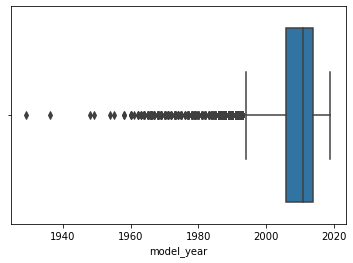

In [20]:
sns.boxplot(data_new['model_year'])

Berdasarkan boxplot di atas, nilai-nilai pada `model_year` memiliki banyak outliers yang melampaui lower whisker data `model_year`, maka kita akan mengisi nilai yang hilang pada model year berdasarkan median dengan kriteria `model`.

In [21]:
mod_year_not_null.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2014.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 80, dtype: float64

In [22]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def fill_missing_values (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range (size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column]=value
    return dataframe

In [23]:
data_new_2 = fill_missing_values(data_new, 'model', 'model_year')

In [24]:
data_new_2.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7891
transmission        0
type                0
paint_color      9267
is_4wd          25951
date_posted         0
days_listed         0
dtype: int64

Nilai-nilai yang hilang pada `model_year` sudah terisi.

### Mengisi Nilai-Nilai yang Hilang pada `cylinders`

Kita akan mengisi nilai-nilai yang hilang pada `cylinders` berdasarkan nilai-nilai pada `model`.

<AxesSubplot:xlabel='cylinders'>

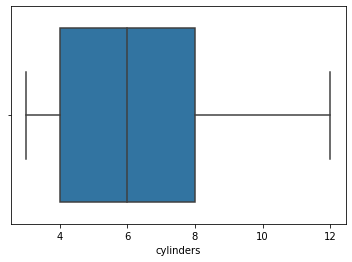

In [25]:
sns.boxplot(data_new_2['cylinders'])

In [26]:
data_new_2.groupby('model')['cylinders'].mean()

model
acura tl             5.971564
bmw x5               6.406375
buick enclave        6.000000
cadillac escalade    7.986348
chevrolet camaro     6.505360
                       ...   
toyota sienna        5.952381
toyota tacoma        5.345205
toyota tundra        7.919561
volkswagen jetta     4.281116
volkswagen passat    4.325949
Name: cylinders, Length: 80, dtype: float64

In [27]:
data_new_2.groupby('model')['cylinders'].median()

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 80, dtype: float64

Karena nilai pada `cylinders` tidak mungkin berupa pecahan, maka alih-alih menggunakan nilai mean untuk mengisi nilai yang hilang, nilai median akan digunakan untuk mengisi nilai yang hilang pada `cylinders` menggunakan fungsi yang sama untuk mengisi nilai kosong pada `model_year`.

In [28]:
data_new_2 = fill_missing_values(data_new_2, 'model', 'cylinders')

In [29]:
data_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51523 non-null  int64  
 1   model_year    51523 non-null  float64
 2   model         51523 non-null  object 
 3   condition     51523 non-null  object 
 4   cylinders     51523 non-null  float64
 5   fuel          51523 non-null  object 
 6   odometer      43632 non-null  float64
 7   transmission  51523 non-null  object 
 8   type          51523 non-null  object 
 9   paint_color   42256 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51523 non-null  object 
 12  days_listed   51523 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Nilai-nilai yang hilang pada `cylinders` sudah terisi.

### Mengisi Nilai-Nilai yang Hilang pada `odometer`

Kita akan mengisi nilai-nilai yang hilang pada `odometer` berdasarkan `model_year`

<AxesSubplot:xlabel='odometer'>

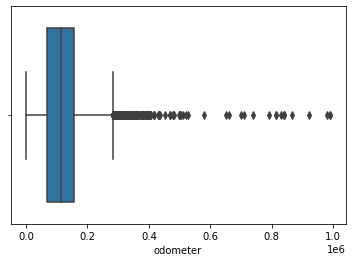

In [30]:
sns.boxplot(data_new_2['odometer'])

Berdasarkan boxplot di atas, nilai pada `odometer` memiliki banyak outlier, maka kita akan menggunakan median untuk mengisi nilai-nilai yang hilang pada `odometer`.

In [31]:
data_new_2 = fill_missing_values(data_new_2, 'model_year', 'odometer')

In [32]:
data_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51523 non-null  int64  
 1   model_year    51523 non-null  float64
 2   model         51523 non-null  object 
 3   condition     51523 non-null  object 
 4   cylinders     51523 non-null  float64
 5   fuel          51523 non-null  object 
 6   odometer      51522 non-null  float64
 7   transmission  51523 non-null  object 
 8   type          51523 non-null  object 
 9   paint_color   42256 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51523 non-null  object 
 12  days_listed   51523 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Setelah menerapkan fungsi `fill_missing_values`, ternyata masih ada satu baris pada `odometer` yang masih kosong.

In [33]:
data_new_2.loc[(data_new_2['model_year']==1995) & (data_new_2['odometer']==0)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
7124,800,1995.0,chevrolet tahoe,fair,8.0,gas,0.0,automatic,SUV,brown,1.0,2019-03-09,26


In [34]:
data_new_2[data_new_2['model_year']==1995]['odometer'].median()

162500.0

In [35]:
data_new_2[data_new_2['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45692,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


Kekosongan itu ternyata karena `model_year` dengan nilai 1929 hanya satu baris dan nilainya kosong. Mempertimbangkan hanya satu baris dengan nilai yang kosong, maka diputuskan untuk melakukan drop terhadap baris tersebut.

In [36]:
data_new_3 = data_new_2.drop(45692).reset_index(drop=True)
data_new_3[data_new_3['model_year']==1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Sudah tidak ada baris pada `model_year` dengan nilai 1929, sehingga kode di atas menghasilkan dataframe kosong.

### Mengisi Nilai-Nilai yang Hilang pada `is_4wd`

In [37]:
data_new_3['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

Berdasarkan pemaparan di atas, data pada `is_4wd` bersifat Boolean (0 dan 1), dan yang terisi hanyalah 1, yang berarti nilai NaN seharusnya diisi dengan 0, maka nilai yang digunakan untuk mengisi nilai-nilai yang kosong pada `is_4wd` adalah 0.

In [38]:
data_new_3['is_4wd'] = data_new_3['is_4wd'].fillna(0)

In [39]:
data_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51522 non-null  int64  
 1   model_year    51522 non-null  float64
 2   model         51522 non-null  object 
 3   condition     51522 non-null  object 
 4   cylinders     51522 non-null  float64
 5   fuel          51522 non-null  object 
 6   odometer      51522 non-null  float64
 7   transmission  51522 non-null  object 
 8   type          51522 non-null  object 
 9   paint_color   42255 non-null  object 
 10  is_4wd        51522 non-null  float64
 11  date_posted   51522 non-null  object 
 12  days_listed   51522 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [40]:
data_new_3['is_4wd'].value_counts()

0.0    25950
1.0    25572
Name: is_4wd, dtype: int64

### Mengisi Nilai-Nilai yang Hilang pada `paint_color`

Karena warna cat mobil bisa sangat beragam walaupun dari tipe dan tahun yang sama, maka sulit menentukan nilai untuk mengisi nilai-nilai yang hilang pada `paint_color`, sehingga diputuskan untuk mengisi nilai-nilai yang hilang dengan 'unknown'.

In [41]:
data_new_3['paint_color'] = data_new_3['paint_color'].fillna('unknown')

In [42]:
data_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51522 non-null  int64  
 1   model_year    51522 non-null  float64
 2   model         51522 non-null  object 
 3   condition     51522 non-null  object 
 4   cylinders     51522 non-null  float64
 5   fuel          51522 non-null  object 
 6   odometer      51522 non-null  float64
 7   transmission  51522 non-null  object 
 8   type          51522 non-null  object 
 9   paint_color   51522 non-null  object 
 10  is_4wd        51522 non-null  float64
 11  date_posted   51522 non-null  object 
 12  days_listed   51522 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Semua nilai yang hilang pada dataset sudah terisi.

### Memeriksa Kembali Duplikat

In [43]:
data_new_3.duplicated().sum()

0

Tidak ditemukan duplikat pada dataset.

## Memperbaiki Tipe Data

In [44]:
data_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51522 non-null  int64  
 1   model_year    51522 non-null  float64
 2   model         51522 non-null  object 
 3   condition     51522 non-null  object 
 4   cylinders     51522 non-null  float64
 5   fuel          51522 non-null  object 
 6   odometer      51522 non-null  float64
 7   transmission  51522 non-null  object 
 8   type          51522 non-null  object 
 9   paint_color   51522 non-null  object 
 10  is_4wd        51522 non-null  float64
 11  date_posted   51522 non-null  object 
 12  days_listed   51522 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Berdasasrkan pemaparan di atas, ada beberapa kolom dengan tipe data yang tidak sesuai, yaitu kolom `model_year` dengan tipe data float, `cylinders` dengan tipe data float, `is_4wd` dengan tipe data float, `date_posted` dengan tipe data object, dan `days_listed` dengan tipe data integer.

### Mengubah Tipe Data pada `model_year`

Kolom `model_year`menunjukkan nilai tahun mobil tersebut dibuat, sehingga tidak wajar apabila nilai disajikan dalam pecahan, maka tipe data pada `model_year` akan diubah ke integer.

In [45]:
data_new_3['model_year'] = data_new_3['model_year'].astype('int')

In [46]:
data_new_3['model_year']

0        2011
1        2011
2        2013
3        2003
4        2017
         ... 
51517    2013
51518    2002
51519    2009
51520    2013
51521    2014
Name: model_year, Length: 51522, dtype: int32

Tipe data pada `model_year` sudah berubah menjadi integer.

### Mengubah Tipe Data pada `cylinders`

Kolom `cylinders`menunjukkan nilai jumlah silinder dalam sebuah mesin mobil, sehingga tidak wajar apabila nilai disajikan dalam pecahan, maka tipe data pada `cylinders` akan diubah ke integer.

In [47]:
data_new_3['cylinders'] = data_new_3['cylinders'].astype('int')

In [48]:
data_new_3['cylinders']

0        6
1        6
2        4
3        8
4        4
        ..
51517    6
51518    4
51519    4
51520    4
51521    4
Name: cylinders, Length: 51522, dtype: int32

Tipe data pada `cylinders` sudah diubah menjadi integer.

### Mengubah Tipe Data pada `date_posted`

Kolom `date_posted` menunjukkan tanggal ketika iklan sebuah mobil ditampilkan, maka tipe data pada `date_posted` akan diubah dari object menjadi datetime.

In [49]:
data_new_3['date_posted'] = pd.to_datetime(data_new_3['date_posted'], format='%Y-%m-%d')

In [50]:
data_new_3['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51517   2018-10-03
51518   2018-11-14
51519   2018-11-15
51520   2018-07-02
51521   2018-06-05
Name: date_posted, Length: 51522, dtype: datetime64[ns]

Tipe data pada `date_posted` sudah diubah menjadi datetime.

### Mengubah Tipe Data pada `is_4wd`

Kolom `is_4wd` menunjukkan status apakah suatu mobil memiliki penggerak empat roda (four-wheel drive) atau tidak. angka 1 menunjukkan 'benar', dan angka 0 menunjukkan 'salah'. Selanjutnya, tipe data pada `is_4wd` akan diubah menjadi boolean agar lebih mudah dipahami.

In [51]:
data_new_3['is_4wd'] = data_new_3['is_4wd'].astype(bool)

In [52]:
data_new_3['is_4wd']

0         True
1         True
2        False
3        False
4        False
         ...  
51517    False
51518    False
51519    False
51520    False
51521    False
Name: is_4wd, Length: 51522, dtype: bool

## Memperbaiki Kualitas Data

### Menambahkan Minggu, Hari, Bulan, dan Tahun ketika Iklan Kendaraan Ditayangkan

In [53]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan
data_new_3['weekday_posted'] = data_new_3['date_posted'].dt.weekday
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1


Kolom hari dalam minggu telah ditambahkan ke dataset.

In [54]:
data_new_3['day_posted'] = data_new_3['date_posted'].dt.day
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,23
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,22
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2


Kolom tanggal iklan ditayangkan telah ditambahkan ke dataset.

In [55]:
data_new_3['month_posted'] = data_new_3['date_posted'].dt.month
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,23,6
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,22,3
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4


Kolom bulan iklan ditayangkan telah ditambahkan ke dataset.

In [56]:
data_new_3['year_posted'] = data_new_3['date_posted'].dt.year
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,23,6,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,22,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019


Kolom tahun iklan ditayangkan telah ditambahkan ke dataset.

### Menambahkan Usia Kendaraan saat Iklan Ditayangkan

In [57]:
# Tambahkan usia kendaraan saat iklan ditayangkan
data_new_3['car_age'] = data_new_3['year_posted'] - data_new_3['model_year']
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,23,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,22,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2


`car_age` dibuat dengan cara membuat kolom hasil dari selisih antara tahun ketika ketika kendaraan diiklankan (`year_posted`) dan tahun ketika mobil dibuat (`model_year`).

In [58]:
data_new_3[data_new_3['car_age']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age
19,13990,2018,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,5,25,8,2018,0
71,23300,2018,nissan frontier,good,6,gas,27493.0,other,pickup,unknown,True,2018-10-13,36,5,13,10,2018,0
78,23800,2019,nissan frontier,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,3,28,2,2019,0
99,39950,2018,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,unknown,True,2018-08-05,16,6,5,8,2018,0
106,21500,2019,nissan frontier,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,4,29,3,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51373,27890,2018,ram 1500,excellent,8,gas,9446.0,automatic,truck,unknown,True,2018-05-06,39,6,6,5,2018,0
51439,28990,2018,ford f-150,excellent,8,gas,10152.0,automatic,truck,white,True,2018-06-13,47,2,13,6,2018,0
51443,15999,2018,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,False,2018-07-28,8,5,28,7,2018,0
51444,33990,2019,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,True,2019-01-25,36,4,25,1,2019,0


Beberapa mobil yang memiliki umur 0 tahun mengesankan bahwa mobil dalam kondisi baru. Hal itu terjadi karena mobil tersebut diproduksi dan diiklankan pada tahun yang sama. Menangani hal itu, sebaiknya kita bulatkan ke atas menjadi 1 tahun, menandakan bahwa mobil dalam keadaan sudah terpakai.

In [59]:
data_new_3.loc[data_new_3['car_age']==0, 'car_age']=1

In [60]:
data_new_3[data_new_3['car_age']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age


`car_age` dengan kondisi 0 tahun sudah tidak ada, sehingga menghasilkan dataframe kosong.

### Menambahkan Jarak Tempuh Rata-Rata Kendaraan per Tahun

In [61]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
data_new_3['average_yearly_distance'] = data_new_3['odometer']/data_new_3['car_age']
data_new_3['average_yearly_distance'] = data_new_3['average_yearly_distance'].round(1)
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age,average_yearly_distance
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,23,6,2018,7,20714.3
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,7,12672.1
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6,18333.3
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,22,3,2019,16,10087.3
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2,40451.5


Jarak tempuh kendaraan rata-rata per tahun, atau `average_yearly_distance` dihasilkan dengan membagi nilai odometer pada `odometer` dengan usia kendaraan pada `car_age`.

### Mengganti Nilai pada Kolom `condition`

Penggantian nilai pada kolom `condition` dilakukan dengan fungsi berikut.

In [62]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah
def change_condition(value):
    if value == 'new':
        result = 5
    elif value == 'like new':
        result = 4
    elif value == 'excellent':
        result = 3
    elif value == 'good':
        result = 2
    elif value == 'fair':
        result = 1
    else:
        result = 0

    return result

In [63]:
data_new_3['condition_numerical'] = data_new_3['condition'].apply(change_condition)
data_new_3.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age,average_yearly_distance,condition_numerical
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,23,6,2018,7,20714.3,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,19,10,2018,7,12672.1,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,7,2,2019,6,18333.3,4
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,False,2019-03-22,9,4,22,3,2019,16,10087.3,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,2,4,2019,2,40451.5,3


Kolom dengan konversi kategori pada kolom `condition` ke angka sudah ditambahkan ke dataset.

## Memeriksa Data yang Sudah Bersih

In [64]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    51522 non-null  int64         
 1   model_year               51522 non-null  int32         
 2   model                    51522 non-null  object        
 3   condition                51522 non-null  object        
 4   cylinders                51522 non-null  int32         
 5   fuel                     51522 non-null  object        
 6   odometer                 51522 non-null  float64       
 7   transmission             51522 non-null  object        
 8   type                     51522 non-null  object        
 9   paint_color              51522 non-null  object        
 10  is_4wd                   51522 non-null  bool          
 11  date_posted              51522 non-null  datetime64[ns]
 12  days_listed              51522 n

In [65]:
# tampilkan sampel data
data_new_3.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age,average_yearly_distance,condition_numerical
1255,27700,2015,ram 3500,excellent,6,diesel,137859.0,automatic,other,orange,True,2018-08-22,42,2,22,8,2018,3,45953.0,3
32267,17490,2016,ford econoline,good,10,gas,122974.0,automatic,truck,yellow,False,2018-11-24,32,5,24,11,2018,2,61487.0,2
31085,24000,2016,ram 2500,excellent,6,diesel,50000.0,manual,truck,silver,True,2018-12-22,24,5,22,12,2018,2,25000.0,3
31734,5495,2010,chrysler town & country,excellent,6,gas,126000.0,automatic,mini-van,unknown,False,2018-12-19,28,2,19,12,2018,8,15750.0,3
24735,6995,2009,chevrolet malibu,good,4,gas,150546.0,automatic,sedan,blue,False,2019-03-11,26,0,11,3,2019,10,15054.6,2


## Mempelajari Parameter Inti

Kita akan mempelahari parameter-parameter inti, yaitu harga, usia kendaraan ketika iklan ditayangkan, jarak tempuh, jumlah silinder, dan kondisi.

### Parameter `price`

<AxesSubplot:xlabel='price', ylabel='Count'>

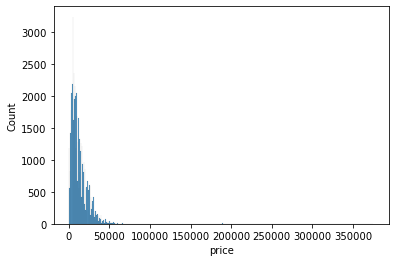

In [66]:
# Histogram dan boxplot pada 'price'
sns.histplot(data_new_3['price'])

<AxesSubplot:xlabel='price'>

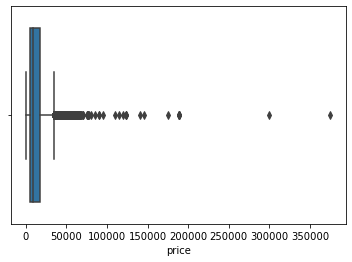

In [67]:
sns.boxplot(data_new_3['price'])

Berdasarkan visualisasi data di atas, dapat kita lihat bahwa data pada `price` memiliki puncak dengan nilai count di atas 3000 ketika nilai `price` mendekati 0 (sangat murah), kemudian melandai seiring kenaikan nilai pada `price`.

Data pada `price` juga memiliki banyak sekali outliers, dapat dilihat berdasarkan banyaknya titik hitam yang melewati upper whisker.

### Parameter `car_age`

<AxesSubplot:xlabel='car_age', ylabel='Count'>

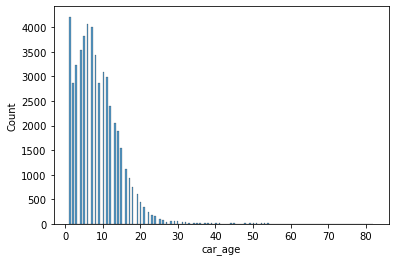

In [68]:
# Histogram dan boxplot pada 'car_age'
sns.histplot(data_new_3['car_age'])

<AxesSubplot:xlabel='car_age'>

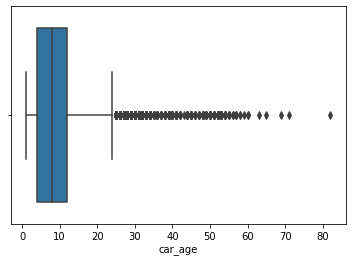

In [69]:
sns.boxplot(data_new_3['car_age'])

Berdasarkan visualisasi data di atas, data pada `car_age` memiliki banyak outliers, yang ditunjukkan dengan banyaknya titik hitam yang melebihi upper whisker.

Histogram dari data pada `car_age` juga menunjukkan bahwa mobil didominasi oleh mobil-mobil yang berumur kurang dari 10 tahun.

### Parameter `odometer`

<AxesSubplot:xlabel='odometer', ylabel='Count'>

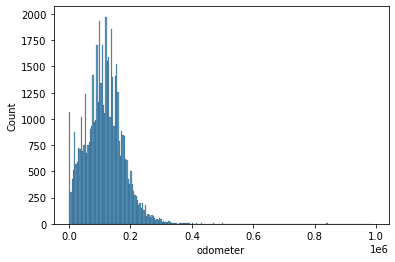

In [70]:
# Histogram dan boxplot 'odometer'
sns.histplot(data_new_3['odometer'])

<AxesSubplot:xlabel='odometer'>

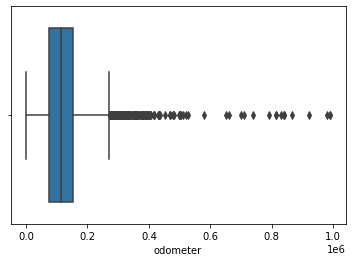

In [71]:
sns.boxplot(data_new_3['odometer'])

Visualisasi data di atas menyatakan bahwa mobil yang ada di data kita didominasi oleh mobil-mobil dengan nilai odometer di bawah 200.000.

Data pada `odometer` juga memiliki banyak sekali outliers ang ditunjukkan dengan banyaknya data yang melampaui upper whisker.

### Parameter `condition_numerical`

<AxesSubplot:xlabel='condition_numerical', ylabel='Count'>

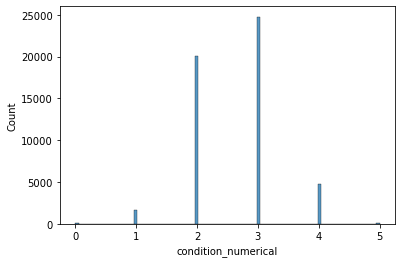

In [72]:
# Histogram dan boxplot 'condition_numerical'
sns.histplot(data_new_3['condition_numerical'])

<AxesSubplot:xlabel='condition', ylabel='count'>

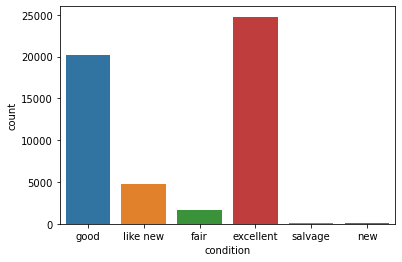

In [73]:
sns.countplot(data_new_3['condition'])

Berdasarkan visualisasi data di atas, kondisi mobil kebanyakan berada di 'excellent', kemudian dominan kedua ada 'good' yang merupakan satu tingkat di bawah excellent. Sedangkan di urutan ketiga ada kondisi 'like new' karena cukup banyak mobil dijual dan dibeli pada tahun yang sama atau bahkan berdekatan.

Sedangkan kondisi 'new', 'salvage', dan 'fair' relatif sedikit, karena orang cenderung enggan untuk menjual mobil dengan kondisi-kondisi tersebut.

### Parameter `cylinders`

<AxesSubplot:xlabel='cylinders', ylabel='count'>

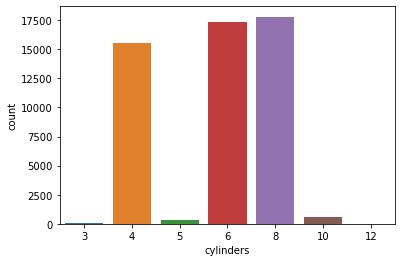

In [74]:
# Countplot pada 'cylinders'
sns.countplot(data_new_3['cylinders'])

Berdasarkan visualisasi data di atas, dapat dilihat bahwa jumlah teratas dari jumlah silinder pada mesin mobil yang diiklankan adalah 4, 6, 8. Mobil dengan 4 silinder sangat lumrah ditemukan di mobil-mobil tipe keluarga, sedangkan mobil-mobil dengan 6 atau 8 silinder lumrah ditemukan di mobil-mobil kencang atau muscle car.

Namun, ada nilai yang tidak lazim pada `cylinders`, yaitu 3, karena mobil pada umumnya memiliki jumlah silinder tidak kurang dari 4.

In [75]:
# menampilkan data dengan jumlah silinder 3
data_new_3[data_new_3['cylinders']==3]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,day_posted,month_posted,year_posted,car_age,average_yearly_distance,condition_numerical
1527,6000,2011,toyota prius,excellent,3,gas,143000.0,automatic,hatchback,black,False,2018-12-30,37,6,30,12,2018,7,20428.6,3
3882,6200,2008,ford f-150,excellent,3,gas,166000.0,automatic,truck,white,False,2018-06-30,67,5,30,6,2018,10,16600.0,3
9244,800,1999,ford ranger,good,3,gas,192000.0,automatic,pickup,white,False,2018-05-29,33,1,29,5,2018,19,10105.3,2
12596,20500,2010,jeep wrangler,excellent,3,gas,79300.0,automatic,SUV,unknown,True,2019-02-08,8,4,8,2,2019,9,8811.1,3
14483,3900,2000,ford ranger,good,3,gas,137780.0,automatic,pickup,blue,True,2018-09-24,16,0,24,9,2018,18,7654.4,2
14932,1150,2004,honda civic,fair,3,diesel,210000.0,automatic,sedan,blue,False,2019-02-09,25,5,9,2,2019,15,14000.0,1
16672,2500,2009,honda civic,excellent,3,hybrid,250000.0,automatic,sedan,grey,False,2019-02-06,29,2,6,2,2019,10,25000.0,3
17239,6000,2009,chevrolet traverse,good,3,gas,63000.0,automatic,SUV,green,False,2018-11-02,48,4,2,11,2018,9,7000.0,2
21102,26124,2018,ford escape,excellent,3,gas,2050.0,automatic,SUV,black,True,2018-10-25,29,3,25,10,2018,1,2050.0,3
22183,1,2015,ford focus,like new,3,gas,78704.5,manual,sedan,unknown,False,2018-10-17,78,2,17,10,2018,3,26234.8,4


In [76]:
# menampilkan perbandingan antara data dengan jumlah silinder 3 dan seluruh data
len(data_new_3[data_new_3['cylinders']==3])/len(data_new_3)*100

0.06599122704863941

Bersumber dari `https://cars.usnews.com/cars-trucks/toyota/prius/2011#:~:text=The%202011%20Toyota%20Prius%20has,a%20pair%20of%20electric%20motors.` mobil Toyota Prius memiliki 4 silinder.

Bersumber dari `https://www.thecarconnection.com/overview/jeep_wrangler_2010#:~:text=2010%20Jeep%20Wrangler-,Performance,or%20four%2Dspeed%20automatic%20transmissions.` mobil Jeep Wrangler memiliki 6 silinder.

Bersumber dari `https://www.vehiclehistory.com/articles/2011-honda-accord-engine-options-include-reasonably-economical-2-4l-four-cylinder-and-punchy-271-horsepower-3-5l-v6` mobil Honda Accord memiliki 4 silinder.

Bersumber dari `https://www.auto123.com/en/new-cars/technical-specs/toyota/camry/2007/base/le/` mobil Toyota Camry memiliki 4 silinder.

Berdasarkan temuan-temuan di atas, saya simpulkan bahwa nilai 3 pada `cylinders` tidak wajar, maka saya putuskan untuk melakukan drop terhadap mobil yang memilki nilai `cylinders` 3, dan panjang datanya juga hanya 0,066% dari dataset yang kita pakai.

In [77]:
# menampilkan index dari data yang akan di-drop
drop_index_cyl = data_new_3[data_new_3['cylinders']==3].index
drop_index_cyl

Int64Index([ 1527,  3882,  9244, 12596, 14483, 14932, 16672, 17239, 21102,
            22183, 22268, 23024, 24449, 26656, 28808, 29421, 30739, 30981,
            32145, 32672, 36128, 36676, 37349, 38665, 39203, 39650, 41030,
            41980, 42051, 42740, 43412, 43560, 44570, 51065],
           dtype='int64')

In [78]:
# menampilkan informasi dataset baru setelah melakukan drop terhadap dataset lama
data_new_4 = data_new_3.drop(drop_index_cyl).reset_index(drop=True)
data_new_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51488 entries, 0 to 51487
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    51488 non-null  int64         
 1   model_year               51488 non-null  int32         
 2   model                    51488 non-null  object        
 3   condition                51488 non-null  object        
 4   cylinders                51488 non-null  int32         
 5   fuel                     51488 non-null  object        
 6   odometer                 51488 non-null  float64       
 7   transmission             51488 non-null  object        
 8   type                     51488 non-null  object        
 9   paint_color              51488 non-null  object        
 10  is_4wd                   51488 non-null  bool          
 11  date_posted              51488 non-null  datetime64[ns]
 12  days_listed              51488 n

## Mempelajari dan Menangani Outlier

Data-data yang kemungkinan memiliki outliers dan perlu ditangani adalah `price`, `car_age`, dan `odometer`. Sedangkan `condition_numerical` dan `cylinders` merupakan data kategorik, jadi dianggap tidak ada outliers.

### Mempelajari dan Menangani Outlier pada `price`

<AxesSubplot:xlabel='price'>

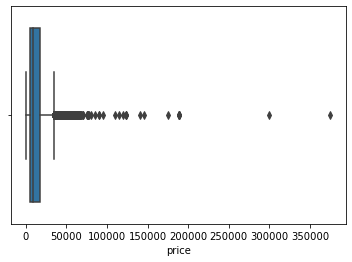

In [79]:
sns.boxplot(data_new_4['price'])

Data pada `price` memiliki banyak outlier di atas upper whisker, bahkan data dengan harga lebih dari 350.000.

Data akan kita filter data berdasarkan upper whisker dan lower whisker pada `price`.

In [80]:
# menentukan batas atas dan batas bawah outlier pada 'price'
Q1_price = data_new_4['price'].quantile(0.25)
Q3_price = data_new_4['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_whisker_price = Q1_price - (1.5*IQR_price)
upper_whisker_price = Q3_price + (1.5*IQR_price)

In [81]:
print('lower whisker price adalah', lower_whisker_price)
print('upper whisker price adalah', upper_whisker_price)

lower whisker price adalah -12776.5
upper whisker price adalah 34627.5


<AxesSubplot:xlabel='price'>

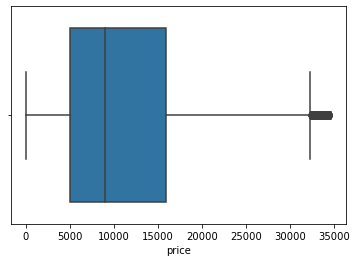

In [82]:
# menyimpan data tanpa outlier dalam DataFrame yang terpisah
df_new = data_new_4[(data_new_4['price']>lower_whisker_price)&(data_new_4['price']<upper_whisker_price)].reset_index(drop=True)
sns.boxplot(df_new['price'])

Setelah difilter sekali, outliers yang nilainya sangat jauh dari whisker sudah tersingkirkan, tapi data masih terdapat outliers, maka diulangi filter sekali lagi.

In [83]:
# menentukan batas atas dan batas bawah outlier baru pada 'price'
Q1_price_2 = df_new['price'].quantile(0.25)
Q3_price_2 = df_new['price'].quantile(0.75)
IQR_price_2 = Q3_price_2 - Q1_price_2
lower_whisker_price_2 = Q1_price_2 - (1.5*IQR_price_2)
upper_whisker_price_2 = Q3_price_2 + (1.5*IQR_price_2)

In [84]:
print('lower whisker price adalah', lower_whisker_price_2)
print('upper whisker price adalah', upper_whisker_price_2)

lower whisker price adalah -11362.5
upper whisker price adalah 32257.5


<AxesSubplot:xlabel='price'>

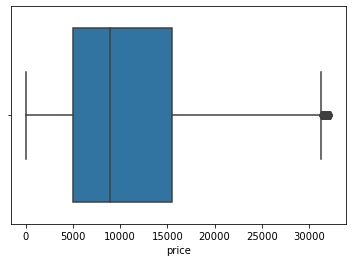

In [85]:
# menyimpan data tanpa outlier dalam DataFrame yang terpisah
df_new_2 = df_new[(df_new['price']>lower_whisker_price_2)&(df_new['price']<upper_whisker_price_2)].reset_index(drop=True)
sns.boxplot(df_new_2['price'])

Setelah difiliter dua kali, dapat dilihat bahwa outliers sudah berkurang banyak. Jauh sekali dibandingkan dengan dataset sebelumnya yang memiliki nilai price di atas 350.000.

### Mempelajari dan Menangani Outlier pada `car_age`

<AxesSubplot:xlabel='car_age'>

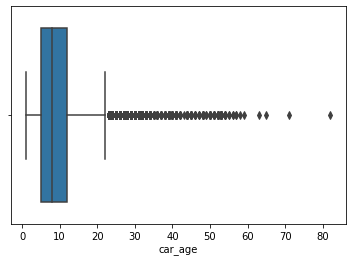

In [86]:
sns.boxplot(df_new_2['car_age'])

Data pada `car_age` memiliki banyak outlier yang melebihi upper whisker, maka akan kita filter berdasarkan lower whisker dan upper whisker pada `car_age`.

In [87]:
# Menentukan batas atas dan batas bawah outlier pada 'car_age'
Q1_car_age = df_new_2['car_age'].quantile(0.25)
Q3_car_age = df_new_2['car_age'].quantile(0.75)
IQR_car_age = Q3_car_age - Q1_car_age
lower_whisker_car_age = Q1_car_age - (1.5*IQR_car_age)
upper_whisker_car_age = Q3_car_age + (1.5*IQR_car_age)

In [88]:
print('lower whisker car_age adalah', lower_whisker_car_age)
print('upper whisker car_age adalah', upper_whisker_car_age)

lower whisker car_age adalah -5.5
upper whisker car_age adalah 22.5


<AxesSubplot:xlabel='car_age'>

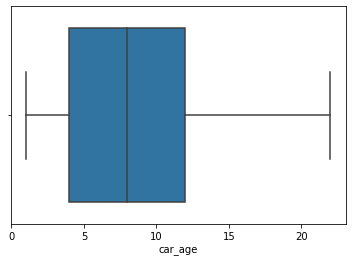

In [89]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
df_new_3 = df_new_2[(df_new_2['car_age']>lower_whisker_car_age)&(df_new_2['car_age']<upper_whisker_car_age)].reset_index(drop=True)
sns.boxplot(df_new_3['car_age'])

Setelah difilter, terlihat data pada `car_age` tidak memiliki outlier lagi.

### Mempelajari dan Menangani Outlier pada `odometer`

<AxesSubplot:xlabel='odometer'>

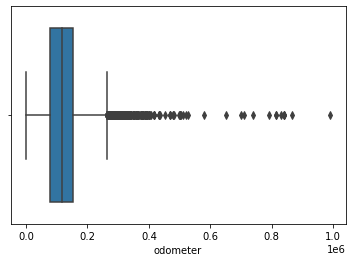

In [90]:
sns.boxplot(df_new_3['odometer'])

Data pada `odometer` memiliki banyak sekali outlier, dapat dilihat dari banyaknya titik hitam yang melebihi upper whisker. Data akan kita filter berdasarkan lower whisker dan upper whisker pada `odometer`.

In [91]:
# menentukan batas atas dan batas bawah outlier pada 'odometer'
Q1_odometer = df_new_3['odometer'].quantile(0.25)
Q3_odometer = df_new_3['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
lower_whisker_odometer = Q1_odometer - (1.5*IQR_odometer)
upper_whisker_odometer = Q3_odometer + (1.5*IQR_odometer)

In [92]:
print('lower whisker odometer adalah', lower_whisker_odometer)
print('upper whisker odometer adalah', upper_whisker_odometer)

lower whisker odometer adalah -32870.5
upper whisker odometer adalah 264633.5


<AxesSubplot:xlabel='odometer'>

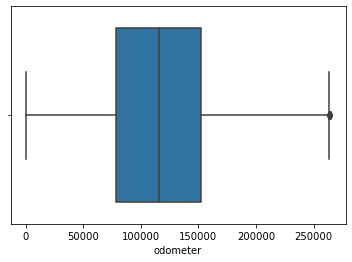

In [93]:
# menyimpan data tanpa outlier dalam DataFrame yang terpisah
df_new_4 = df_new_3[(df_new_3['odometer']>lower_whisker_odometer)&(df_new_3['odometer']<upper_whisker_odometer)].reset_index(drop=True)
sns.boxplot(df_new_4['odometer'])

`odometer` masih memiliki outliers walau sedikit. Namun, data dengan nilai ekstrem pada `odometer` yang sebelumnya sudah disisihkan.

## Mempelajari Parameter Inti Tanpa Outlier

### Mempelajari Parameter `price` Tanpa Outlier

<AxesSubplot:xlabel='price'>

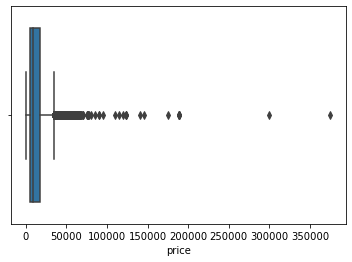

In [94]:
sns.boxplot(data_new_4['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

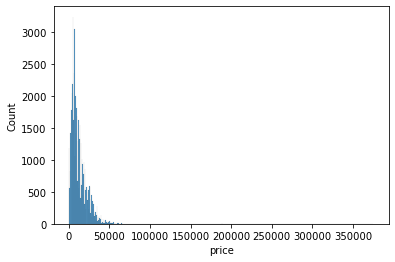

In [95]:
sns.histplot(data_new_4['price'])

In [96]:
data_new_4['price'].describe()

count     51488.000000
mean      12134.668661
std       10042.875026
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16851.000000
max      375000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

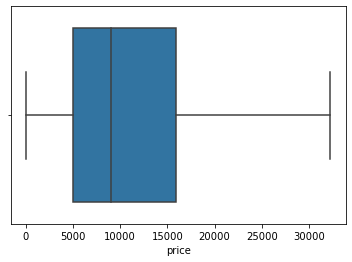

In [97]:
sns.boxplot(df_new_4['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

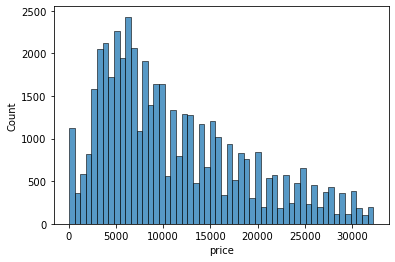

In [98]:
sns.histplot(df_new_4['price'])

In [99]:
df_new_4['price'].describe()

count    47654.000000
mean     11062.241554
std       7569.726129
min          1.000000
25%       4999.000000
50%       8995.000000
75%      15900.000000
max      32250.000000
Name: price, dtype: float64

Berdasarkan pemaparan di atas, nilai count berubah menjadi lebih sedikit setelah difilter, karena dalam proses filter terjadi penyisihan data yang termasuk outlier.

Nilai mean setelah difilter berubah cukup signifikan, sehingga menjadi lebih kecil. Itu terjadi karena banyaknya outlier di sebelah kanan atau melebihi upper whisker.

Sedangkan, nilai pada median berubah tidak signifikan, walaupun berubah menjadi lebih kecil.

Nilai max pada `price` setelah difilter juga tentu saja berubah dibandingkan sebelum difilter, karena nilai max pada `price` sebelum difilter adalah outlier.

### Mempelajari Parameter `car_age` Tanpa Outlier

<AxesSubplot:xlabel='car_age'>

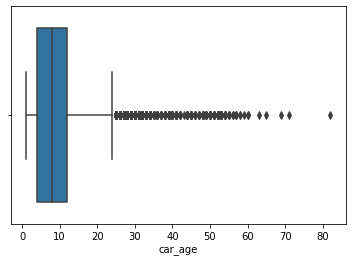

In [100]:
sns.boxplot(data_new_4['car_age'])

<AxesSubplot:xlabel='car_age', ylabel='Count'>

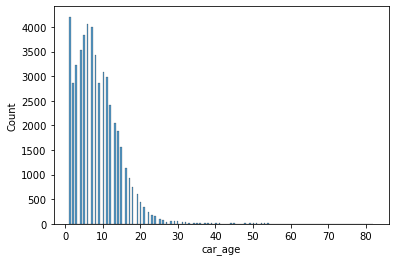

In [101]:
sns.histplot(data_new_4['car_age'])

In [102]:
data_new_4['car_age'].describe()

count    51488.000000
mean         8.545525
std          6.007892
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         82.000000
Name: car_age, dtype: float64

<AxesSubplot:xlabel='car_age'>

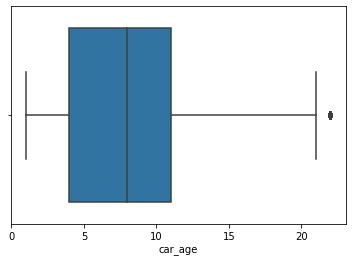

In [103]:
sns.boxplot(df_new_4['car_age'])

<AxesSubplot:xlabel='car_age', ylabel='Count'>

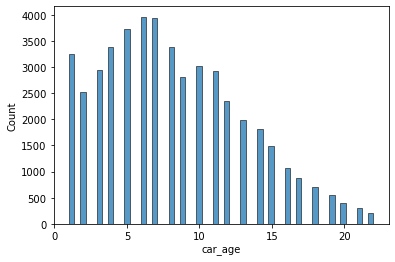

In [104]:
sns.histplot(df_new_4['car_age'])

In [105]:
df_new_4['car_age'].describe()

count    47654.000000
mean         8.219751
std          4.856864
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         22.000000
Name: car_age, dtype: float64

Dapat kita lihat dari pemaparan di atas bahwa nilai count setelah difilter berubah cukup signifikan dengan selisih 4.020, menandakan ada 4.020 outliers yang disisihkan setelah filter.

Nilai pada mean berubah tidak signifikan, yang berarti nilai count pada data outlier terbilang rendah. Begitu pula dengan nilai mediannya; tidak berubah.

Sedangkan pada nilai max berubah sangat jauh setelah difilter, dari 82 menjadi 22.

### Mempelajari Parameter `odometer` Tanpa Outlier

<AxesSubplot:xlabel='odometer'>

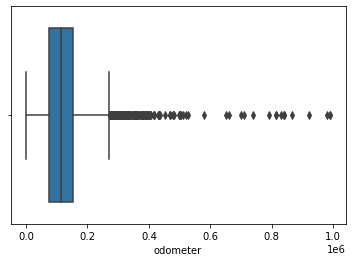

In [106]:
sns.boxplot(data_new_4['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

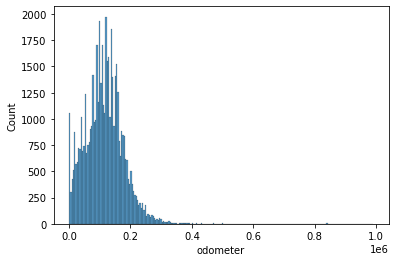

In [107]:
sns.histplot(data_new_4['odometer'])

In [108]:
data_new_4['odometer'].describe()

count     51488.000000
mean     115219.543292
std       62062.581593
min           0.000000
25%       73574.000000
50%      114000.000000
75%      152773.000000
max      990000.000000
Name: odometer, dtype: float64

<AxesSubplot:xlabel='odometer'>

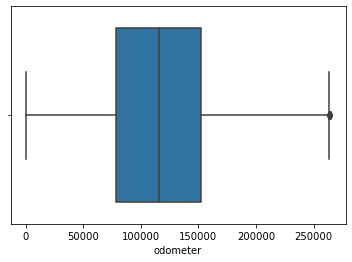

In [109]:
sns.boxplot(df_new_4['odometer'])

<AxesSubplot:xlabel='odometer', ylabel='Count'>

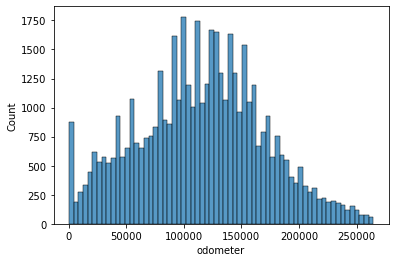

In [110]:
sns.histplot(df_new_4['odometer'])

In [111]:
df_new_4['odometer'].describe()

count     47654.000000
mean     114741.570319
std       55014.262846
min           0.000000
25%       77968.000000
50%      116000.000000
75%      152000.000000
max      264586.000000
Name: odometer, dtype: float64

Banyaknya selisih data yang tersingkirkan menyebabkan perubahan nilai mean yang cukup signifikan setelah data difilter. Nilai mean menjadi lebih kecil setelah difilter.

Nilai max pada `odometer` sebelum difilter sangat tinggi dibandingkan setelah difilter. Nilai max yang ditunjukkan pada `odometer` sebelum difilter mendekati nilai max pada suatu mobil, yang kemungkinan berasal dari mobil dengan umur yang sangat tua. Dan sebelumnya outliers pada `car_age` sudah disisihkan.

Namun, dapat dilihat bahwa nilai Q1, Q2, dan Q3 menjadi lebih besar setelah difilter.

## Masa Berlaku Iklan

In [112]:
df_new_4['days_listed'].describe()

count    47654.000000
mean        39.535128
std         28.191852
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Berdasarkan pemaparan di atas, dapat dilihat bahwa rata-rata suatu iklan tayang adalah 39,5 hari atau dapat dibulatkan menjadi 40 hari. Sedangkan mediannya adalah 33 hari, tidak terlalu jauh dibandingkan dengan rata-ratanya.

Nilai terkecil pada `days_listed` adalah 0 hari, yang berarti ketika suatu mobil diiklankan, dia tidak pernah benar-benar muncul untuk diperlihatkan ke pengunjung situs web.

Nilai terlama dalam `days_listed` adalah 271 hari atau setara 9 bulan.

## Harga Rata-Rata Setiap Jenis Kendaraan

Kita akan melakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan.

In [113]:
agg_group_1 = df_new_4.groupby(['type']).agg({
    'price':'mean',
    'model':'count'
}).rename(columns={
    'price':'avg_price',
    'model':'count_type'
}).sort_values(by='count_type', ascending=False)
agg_group_1

,avg_price,count_type
type,,
sedan,6974.020120,11978
SUV,10295.895054,11768
truck,14892.757911,10839
pickup,14734.997704,6098
coupe,13573.365977,1981
wagon,8992.097870,1502
mini-van,8032.728784,1143
hatchback,6827.912263,1003
van,8860.962134,581


Berdasarkan pemaparan di atas dapat kita lihat bahwa dua jenis kendaraan dengan jumlah ikan terbanyak adalah sedan dan SUV.

Text(0, 0.5, 'average price per type')

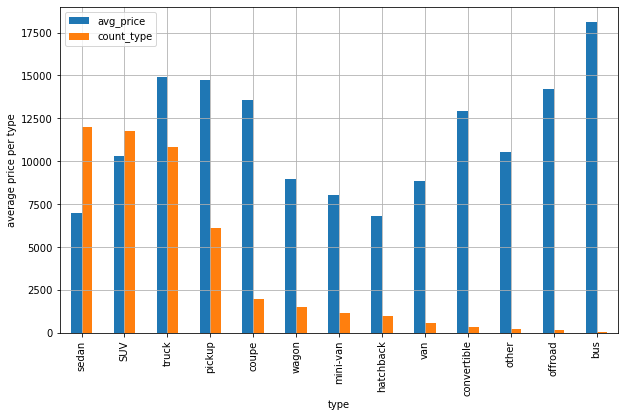

In [114]:
agg_group_1.plot(kind='bar', grid=True, figsize= (10,6))
plt.ylabel('average price per type')

Sedan dan SUV adalah kendaraan yang sering diandalkan sehari-hari, dan dapat kita lihat bahwa sedan dan SUV memiliki harga rata-rata yang relatif lebih rendah dibandingkan dengan tipe kendaraan lain. Hal itu menjadi salah satu faktor mengapa dua kendaraan tersebut banyak dicari, sehingga jumlah iklannya paling banyak.

Dapat kita lihat pula tipe-tipe kendaraan lain yang kurang diandalkan sehari-hari memiliki jumlah iklan yang jauh lebih rendan dibanding sedan dan SUV. Di ujung dengan jumlah iklan sangat rendah dan harga sangat tinggi ada bus yang lazimnya digunakan untuk kendaraan umum.

## Faktor Harga

Kita akan menganalisis faktor yang kemungkinan mempengaruhi harga, di antaranya adalah usia, jarak tempuh, kondisi, tipe mobil, transmisi, dan warnanya.

### Faktor Harga pada Mobil Sedan

In [115]:
df_sedan = df_new_4[df_new_4['type']=='sedan'].reset_index(drop=True)

In [116]:
df_sedan.corr()['price']

price                      1.000000
model_year                 0.620238
cylinders                 -0.045989
odometer                  -0.562822
is_4wd                     0.036737
days_listed                0.000091
weekday_posted            -0.004021
day_posted                 0.006329
month_posted              -0.018978
year_posted                0.016598
car_age                   -0.614842
average_yearly_distance    0.267067
condition_numerical        0.292139
Name: price, dtype: float64

Text(0.5, 1.0, 'correlation between price and car age')

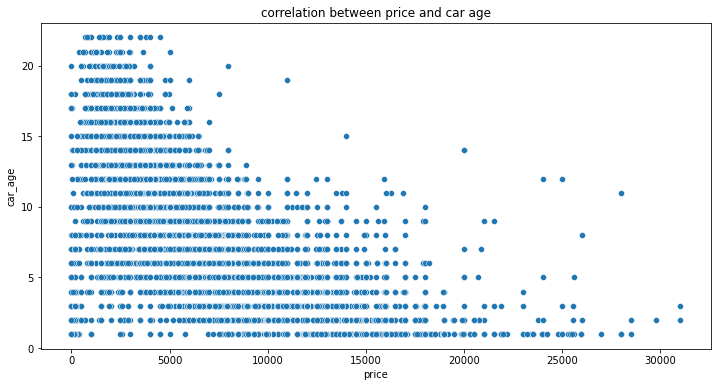

In [117]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_sedan, x='price', y='car_age')
plt.title('correlation between price and car age')

Pengaruh usia mobil terhadap harga mobil cukup besar, ditunjukkan dengan koefisien yang cukup besar, yaitu 0,61.

Pengaruh usia mobil terhada harga bersifat negatif atau berbanding terbalik, yang artinya semakin tinggi harga suatu mobil, maka semakin muda usia mobil tersebut. Dapat dilihat pada scatterplot bahwa mobil dengan harga paling tinggi berada di bawah atau di titik usia mobil sangat muda.

Sedangkan, semakin rendah harga suatu mobil, maka kemungkinan semakin tua pula usia mobil tersebut. Dapat dilihat pada scatterplot bahwa mobil dengan harga paling rendah berada di kiri atau di titik harga mobil sangat rendah.

Text(0.5, 1.0, 'correlation between price and odometer')

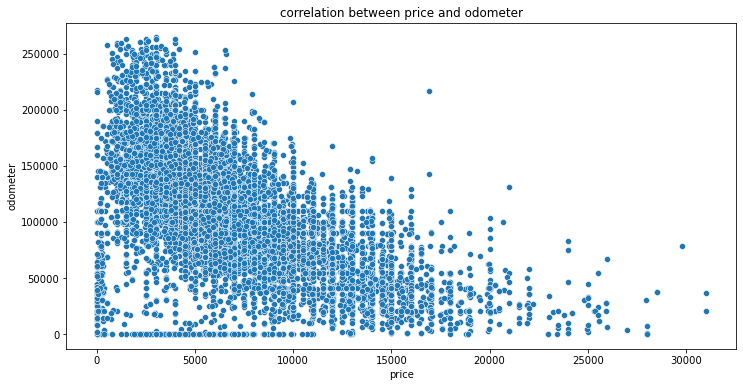

In [118]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_sedan, x='price', y='odometer')
plt.title('correlation between price and odometer')

Pengaruh odometer terhadap mobil cukup besar, dapat dilihat dari koefisien pada tabel korelasi sebesar 0,56 dan bernilai negatif atau berbanding terbalik.

Dapat kita lihat mobil dengan harga paling rendah memiliki nilai odometer yang sangat tinggi, diwakilkan dengan titik biru yang berada di kiri-atas.

Begitu pula sebaliknya, mobil dengan harga paling tinggi memiliki nilai odometer yang sangat rendah, diwakilkan dengan titik biru yang berada di kanan-bawah.

Text(0.5, 1.0, 'correlation between price and condition')

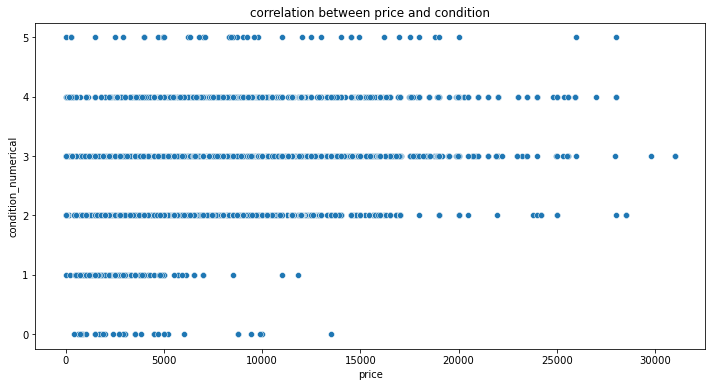

In [119]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_sedan, x='price', y='condition_numerical')
plt.title('correlation between price and condition')

Berdasarkan tabel korelasi di atas, kondisi memiliki pengaruh yang cukup lemah terhadap harga suatu mobil, ditunjukkan dengan nilai koefisien 0,29. Namun, pengaruhnya positif atau berbanding lurus.

Dapat kita lihat bahwa mobil dengan kondisi buruk (0) memiliki nilai tertinggi yang rendah dibandingkan dengan kondisi mobil di atasnya.

Sedangkan mobil-mobil dengan kondisi bagus memiliki harga tertinggi dalam dataset.

In [120]:
df_sedan['transmission'].value_counts()

automatic    11274
manual         572
other          132
Name: transmission, dtype: int64

Dapat dilihat bahwa nilai dari masing-masing transmisi telah memiliki nilai lebih dari lima puluh, maka tidak perlu ada transformasi data.

Text(0.5, 1.0, 'correlation between price and transmission')

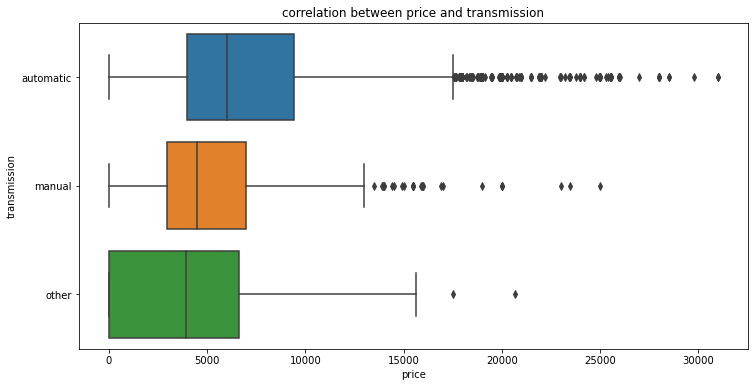

In [121]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_sedan, x='price', y='transmission')
plt.title('correlation between price and transmission')

Transmisi automatic memiliki nilai median tertinggi dibanding yang lain. Sedangkan, transmisi manual memiliki nilai median di urutan kedua, dan di urutan ketiga adalah median dengan transmisi others.

Dapat dilihat pula pada table value counts di atas, bahwa transmisi automatic memiliki jumlah paling banyak, sehingga di boxplot di atas transmisi automatic juga memiliki outliers paling banyak.

In [122]:
df_sedan['paint_color'].value_counts()

unknown    2151
silver     2033
black      1750
grey       1607
white      1484
blue       1218
red         934
custom      294
brown       252
green       202
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

Ternyata pada `paint_color` terdapat jumlah iklan kurang dari lima puluh, maka warna-warna itu akan kita sisihkan.

In [123]:
list_include_colors_sedan = list(df_sedan['paint_color'].value_counts()[:-3].index)

In [124]:
df_sedan_colors = df_sedan[df_sedan['paint_color'].isin(list_include_colors_sedan)].reset_index(drop=True)

Text(0.5, 1.0, 'correlation between price and paint colors')

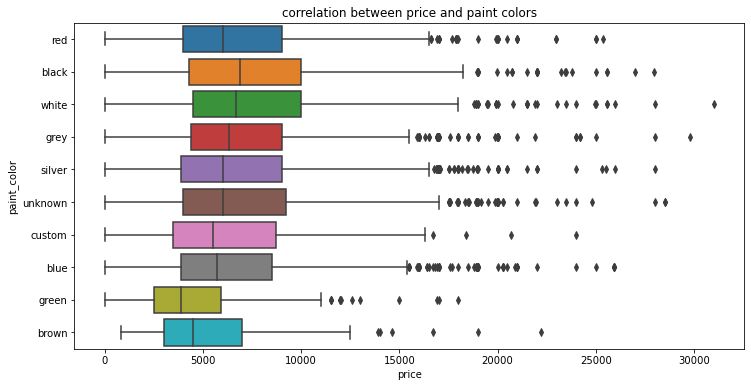

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_sedan_colors, x='price', y='paint_color')
plt.title('correlation between price and paint colors')

Nilai median pada `paint_color` satu sama lain ada yang hampir sama dan cukup berbeda secara signifikan.

Namun, setengah data dari semua warna memiliki harga di bawah 10.000. Hal itu menunjukkan warna-warna tersebut terdapat di semua mobil mulai dari yang paling murah hingga yang paling mahal.

### Faktor Harga pada Mobil SUV

In [126]:
df_suv = df_new_4[df_new_4['type']=='SUV'].reset_index(drop=True)

In [127]:
df_suv.corr()['price']

price                      1.000000
model_year                 0.575819
cylinders                 -0.013919
odometer                  -0.515524
is_4wd                     0.108264
days_listed               -0.013955
weekday_posted             0.014333
day_posted                -0.000500
month_posted              -0.004838
year_posted               -0.001867
car_age                   -0.576725
average_yearly_distance    0.261959
condition_numerical        0.261546
Name: price, dtype: float64

Text(0.5, 1.0, 'correlation between price and car age')

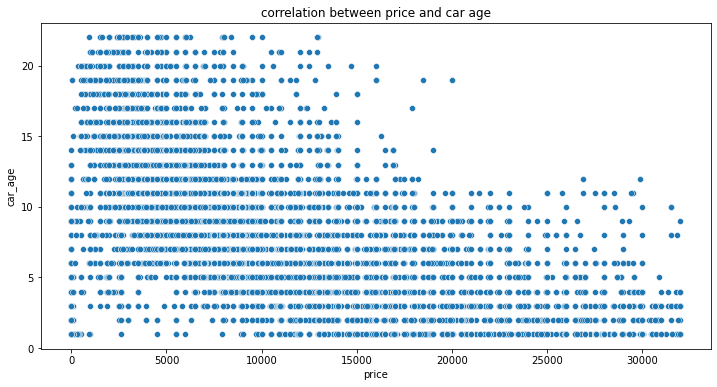

In [128]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_suv, x='price', y='car_age')
plt.title('correlation between price and car age')

Pengaruh usia mobil terhadap harga mobil cukup besar, ditunjukkan dengan koefisien yang cukup besar, yaitu 0,58.

Pengaruh usia mobil terhada harga bersifat negatif atau berbanding terbalik, yang artinya semakin tinggi harga suatu mobil, maka semakin muda usia mobil tersebut. Dapat dilihat pada scatterplot bahwa mobil dengan harga paling tinggi memiliki usia mobil yang rendah.

Sedangkan, semakin rendah harga suatu mobil, maka kemungkinan semakin tua pula usia mobil tersebut. Dapat dilihat pada scatterplot bahwa mobil dengan harga paling rendah berada di kiri atau di titik harga mobil sangat murah.

Text(0.5, 1.0, 'correlation between price and odometer')

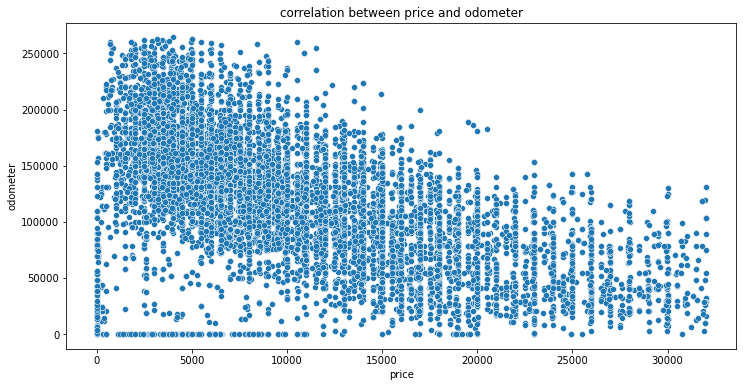

In [129]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_suv, x='price', y='odometer')
plt.title('correlation between price and odometer')

Pengaruh odometer terhadap mobil cukup besar, dapat dilihat dari koefisien pada tabel korelasi sebesar 0,52 dan bernilai negatif atau berbanding terbalik.

Dapat kita lihat mobil dengan harga paling rendah memiliki nilai odometer yang sangat tinggi, diwakilkan dengan titik biru yang berada di kiri-atas.

Begitu pula sebaliknya, mobil dengan harga paling tinggi memiliki nilai odometer yang sangat rendah, diwakilkan dengan titik biru yang berada di kanan-bawah.

Text(0.5, 1.0, 'correlation between price and condition')

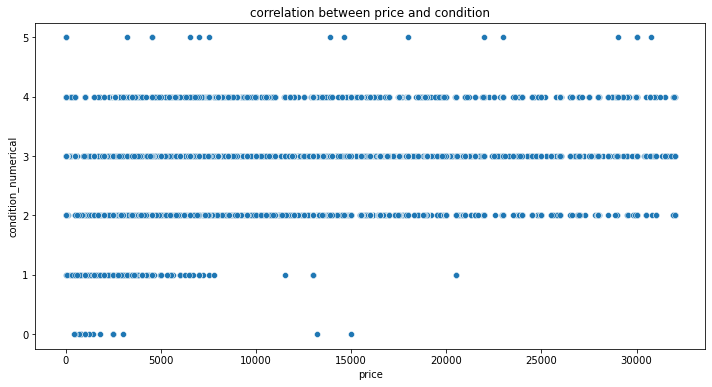

In [130]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_suv, x='price', y='condition_numerical')
plt.title('correlation between price and condition')

Pengaruh kondisi terhadap harga cukup lemah, ditunjukkan dengan nilai koefisien yang kecil, yaitu 0,26 pada tabel korelasi. Namun, pengaruhnya adalah positif, yang berarti semakin bagus kondisi mobilnya, maka semakin tinggi pula harganya.

Dapat kita lihat mobil dengan kondisi paling rendah (0) memiliki nilai harga tertinggi dibanding kondisi mobil lain yang lebih baik.

Dapat kita lihat pula mobil dengan harga tinggi memiliki kondisi yang cukup bagus, yaitu 3, 4, dan 5.

In [131]:
df_suv['transmission'].value_counts()

automatic    11155
manual         455
other          158
Name: transmission, dtype: int64

Dapat kita lihat bahwa iklan dari masing-masing transmisi bernilai lebih dari lima puluh, maka tidak perlu ada transformasi data.

Text(0.5, 1.0, 'correlation between price and transmission')

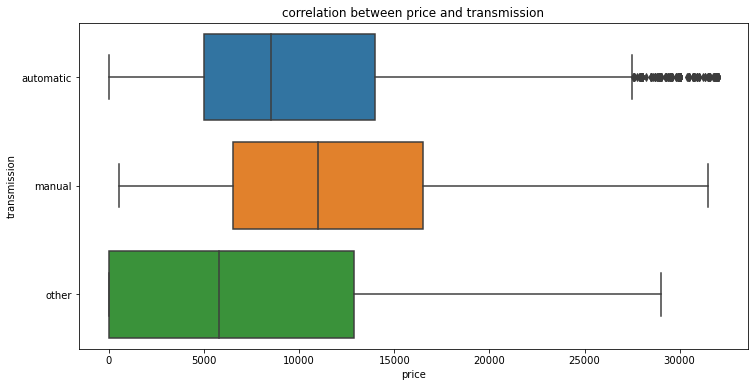

In [132]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_suv, x='price', y='transmission')
plt.title('correlation between price and transmission')

Transmisi manual memiliki median paling tinggi, kemudian selanjutnya ada transmisi automatic, dan yang terakhir ada transmisi others.

Mobil SUV dengan transmisi automatic memiliki jumlah paling banyak berdasarkan tabel value counts di atas, sehingga data pada transmisi automatic memiliki banyak outliers.

Perbedaan jumlah antara transmisi automatic dan yang lainnya cukup signifikan, sehingga hal itu juga mempengaruhi transmisi manual dan others tidak memiliki outliers.

In [133]:
df_suv['paint_color'].value_counts()

unknown    2117
black      2058
white      1849
silver     1522
grey       1137
blue       1003
red         862
green       407
brown       351
custom      297
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64

Dapat kita lihat bahwa terdapat dua warna dengan jumlah iklan kurang dari lima puluh, yaitu yellow dan purple, maka dua warna tersebut akan kita singkirkan.

In [134]:
list_include_colors_suv = list(df_suv['paint_color'].value_counts()[:-2].index)

In [135]:
df_suv_colors = df_suv[df_suv['paint_color'].isin(list_include_colors_suv)].reset_index(drop=True)

Text(0.5, 1.0, 'correlation between price and paint color')

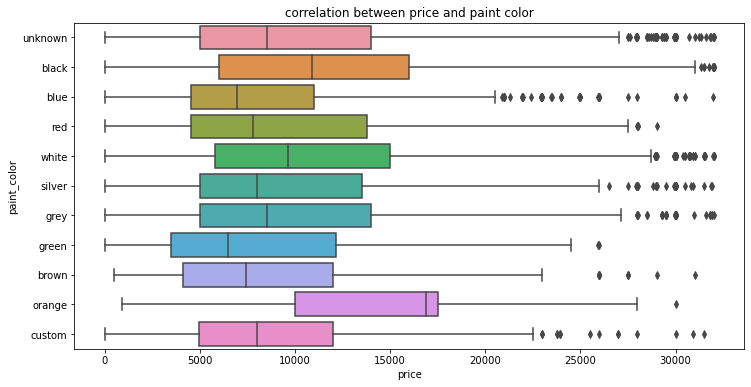

In [136]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_suv_colors, x='price', y='paint_color')
plt.title('correlation between price and paint color')

Dibandingkan dengan sedan, median `paint_color` pada SUV memiliki perbedaan yang cukup signifikan satu sama lain.

Di sini warna cat orange memiliki median paling tinggi, tapi hanya memiliki sedikit outliers.

Dapat kita lihat semua warna memiliki panjang lower whisker dan upper whisker yang panjang, menandakan semua warna di atas terdapat di mobil dengan harga murah hingga mobil dengan harga mahal.

## Kesimpulan Umum

### Insights and Findings

Dataset ini memiliki beberapa kolom dengan nilai yang hilang dan tipe data yang tidak sesuai. Namun, dataset ini tidak memiliki duplikat.

Beberapa data yang hilang seperti `model_year`, `cylinder`, dan `odometer` dapat diisi berdasarkan nilai mean atau mediannya berdasarkan kriteria kolom lain yang masih berhubungan dengan tiga kolom tersebut. Sedangkan, mengisi data yang hilang pada `paint_color` cukup sulit dilakukan karena satu tipe mobil dapat memiliki beragam warna. Kondisi tersebut terpaksa membuat kita mengisi nilai yang hilang dengan 'unknown'. Nilai-nilai yang hilang tersebut kemungkinan terjadi karena human error ketika pendaftar iklan sengaja tidak memasukkan data karena tidak tahu detail mobil yang coba diiklankannya.

Berdasarkan analisis yang sudah dilakukan, harga mobil dipengaruhi banyak faktor. Beberapa faktor yang pengaruhnya cukup besar adalah odometer, usia mobil, dan kondisi mobil. Pengaruh harga terhadap odometer dan usia mobil berbanding terbalik, sedangkan pengaruh harga terhadap kondisi mobil berbanding lurus.

Berdasarkan analisis yang sudah dilakukan, diketahui setidaknya dibutuhkan waktu 40 hari untuk iklan ditayangkan hingga mobil laku terjual. Agar mobil laku terjual, pastikan mobil tersebut memiliki odometer yang tidak terlalu tinggi, usia yang tidak terlalu tua, dan kondisi mobil yang bagus.

### Saran

Agar dapat menghindari hilangnya data, sebaiknya pasang dialogbox yang mengingatkan calon pengiklan untuk mengisi data yang belum terisi atau sarankan nilai tertentu apabila calon pengiklan tidak tahu harus mengisi apa. Terapkan pula kewajiban bagi calon pengiklan untuk mengisi semua data yang dibutuhkan sebelum submit iklan.